<a href="https://colab.research.google.com/github/thisisZAQ/Decoding-Fiscal-Narratives-A-20-Year-NLP-Study-of-India-s-Union-Budgets/blob/main/Budget_Speeches.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **start here**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# Load the CSV file
file_path = '/content/Speech_20years.csv'  # Replace with your file path
df = pd.read_csv(file_path)

# Clean the column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Drop rows with missing speech data and group by Year and Finance Minister
df_cleaned = df[['Year', 'Minister', 'Speech']].dropna()
df_grouped = df_cleaned.groupby(['Year', 'Minister'])['Speech'].apply(lambda x: ' '.join(x)).reset_index()




In [2]:
# Calculate the length of each speech in words
df_grouped['Speech Length'] = df_grouped['Speech'].apply(lambda x: len(x.split()))

# Group by Finance Minister and calculate the total speech length for each minister
speech_length_by_minister = df_grouped.groupby('Minister')['Speech Length'].sum().reset_index()

# Sort by speech length for better visualization
speech_length_by_minister = speech_length_by_minister.sort_values(by='Speech Length', ascending=False)

# Display the results
speech_length_by_minister.head()


,Minister,Speech Length
2,P. Chidambaram,77121
0,Arun Jaitley,71043
1,Nirmala Sitharaman,59046
3,Pranab Mukherjee,51514


In [3]:
# Calculate the length of each speech in words
df_grouped['Speech Length'] = df_grouped['Speech'].apply(lambda x: len(x.split()))

# Group by Finance Minister and calculate the total speech length for each minister
speech_length_by_minister = df_grouped.groupby('Minister')['Speech Length'].sum().reset_index()

# Sort by speech length for better visualization
speech_length_by_minister = speech_length_by_minister.sort_values(by='Speech Length', ascending=False)

# Display the results
speech_length_by_minister.head()

df_grouped.tail()
speech_length_by_minister.head()


,Minister,Speech Length
2,P. Chidambaram,77121
0,Arun Jaitley,71043
1,Nirmala Sitharaman,59046
3,Pranab Mukherjee,51514


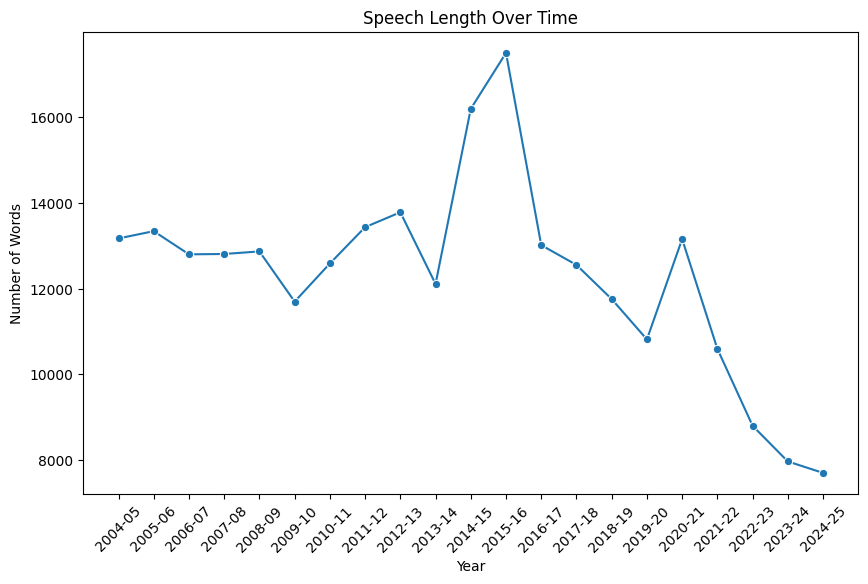

In [4]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Speech Length', data=df_grouped, marker='o')
plt.title('Speech Length Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Words')
plt.xticks(rotation=45)
plt.show()

In [5]:
import plotly.express as px

# Create the bar plot using Plotly Express
fig = px.bar(speech_length_by_minister,
             x='Speech Length',
             y='Minister',
             orientation='h',  # Horizontal bar plot
             title='Total Speech Length by Finance Minister',
             labels={'Speech Length': 'Speech Length (Word Count)', 'Minister': 'Minister'},
             color='Speech Length',  # Color based on speech length
             color_continuous_scale='Viridis')

# Customize layout (optional)
fig.update_layout(
    xaxis_title="Total Speech Length (Word Count)",
    yaxis_title="Finance Minister",
    height=600,
    width=900,
)

# Show the plot
fig.show()



In [6]:
%pip install wordcloud

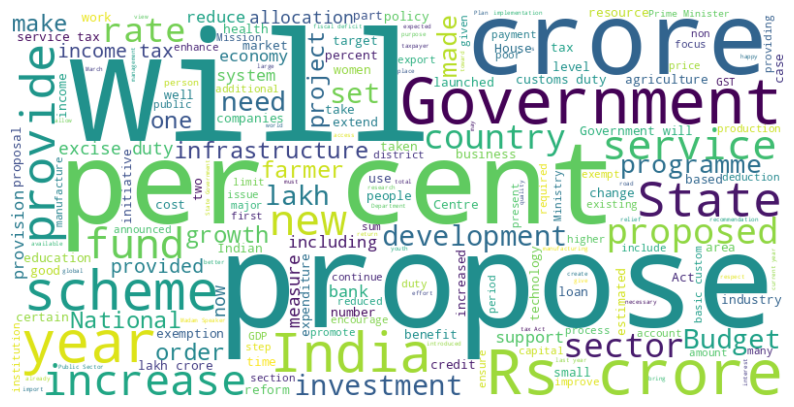

In [7]:
from wordcloud import WordCloud

# Combine all speeches into one large text
all_text = ' '.join(df_grouped['Speech'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [8]:
import spacy
from spacy import displacy

# Load the spaCy language model
nlp = spacy.load("en_core_web_sm")

# Visualize named entities for the first speech
doc = nlp(df_grouped['Speech'][0])
displacy.render(doc, style='ent', jupyter=True)

In [9]:
# Define themes and associated keywords
themes = {
    'inflation': ['inflation', 'prices', 'cost of living'],
    'tax': ['tax', 'taxation', 'income tax', 'corporate tax'],
    'growth': ['growth', 'development', 'GDP', 'economy'],
    'employment': ['employment', 'jobs', 'unemployment','MSME'],
    'budget': ['deficit', 'surplus', 'expenditure'],
    'education': ['education', 'schools', 'youth','children'],
    'defence': ['defence', 'national', 'security','threat'],
}


In [10]:
import re

# Function to count keyword occurrences for a specific theme
def count_keywords(speech, keywords):
    count = 0
    for keyword in keywords:
        count += len(re.findall(r'\b' + re.escape(keyword) + r'\b', speech.lower()))
    return count

# Add columns for each theme, counting the occurrences of theme-related words
for theme, keywords in themes.items():
    df_grouped[theme] = df_grouped['Speech'].apply(lambda x: count_keywords(x, keywords))

# Display the dataframe with theme counts
df_grouped.head()
df_grouped.info()
df_grouped.to_csv('speech_with_theme_counts.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Year           21 non-null     object
 1   Minister       21 non-null     object
 2   Speech         21 non-null     object
 3   Speech Length  21 non-null     int64 
 4   inflation      21 non-null     int64 
 5   tax            21 non-null     int64 
 6   growth         21 non-null     int64 
 7   employment     21 non-null     int64 
 8   budget         21 non-null     int64 
 9   education      21 non-null     int64 
 10  defence        21 non-null     int64 
dtypes: int64(8), object(3)
memory usage: 1.9+ KB


In [11]:
import plotly.express as px

# Group by Finance Minister and sum the keyword counts for each theme
theme_counts_by_minister = df_grouped.groupby('Minister')[list(themes.keys())].sum().reset_index()

# Melt the DataFrame to make it long-form for easier plotting
theme_counts_melted = theme_counts_by_minister.melt(id_vars='Minister', var_name='Theme', value_name='Count')

# Plot the theme mentions using Plotly Express
fig = px.bar(theme_counts_melted,
             x='Minister',
             y='Count',
             color='Theme',
              color_discrete_sequence=px.colors.qualitative.T10,
             title='Theme Mentions by Finance Minister',
             labels={'Count': 'Number of Mentions', 'Minister': 'Finance Minister'},
             barmode='group')

# Customize layout
fig.update_layout(xaxis_title='Finance Minister', yaxis_title='Number of Mentions', height=600, width=1000)
fig.show()


In [12]:
import plotly.express as px

# Plot the theme mentions using a stacked bar chart
fig = px.bar(theme_counts_melted,
             x='Minister',
             y='Count',
             color='Theme',
             title='Comparison of Themes by Finance Minister',
             labels={'Count': 'Number of Mentions', 'Name of Finance Minister': 'Finance Minister'},
             barmode='stack')  # Use 'stack' to create a stacked bar chart

fig.update_layout(xaxis_title='Finance Minister', yaxis_title='Number of Mentions', height=600, width=1000)
fig.show()


In [13]:
import plotly.graph_objects as go
import numpy as np

# Pivot the data to get ministers as rows and themes as columns
heatmap_data = theme_counts_by_minister.set_index('Minister')

# Create a heatmap
fig = go.Figure(data=go.Heatmap(
        z=heatmap_data.values,
        x=heatmap_data.columns,
        y=heatmap_data.index,
        colorscale='Viridis'))

# Update layout
fig.update_layout(title='Heatmap of Theme Mentions by Finance Minister',
                  xaxis_title='Themes',
                  yaxis_title='Finance Minister',
                  height=600,
                  width=1000)

fig.show()


# LDA

In [14]:
!pip install pandas spacy gensim pyLDAvis matplotlib


In [15]:
import spacy
from gensim.utils import simple_preprocess
from gensim.corpora import Dictionary
from nltk.corpus import stopwords
from gensim.models import LdaModel

# Load spaCy model for lemmatization
nlp = spacy.load('en_core_web_sm')

# Function to preprocess text (tokenization, lemmatization, stopwords removal)
def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return tokens

# Define custom stopwords (domain-specific words)
custom_stopwords = ['cent', 'crore', 'propose', 'year', 'tax', 'government', 'duty', 'lakh','rate','shall','new','high','provide','rs']

# Load the spaCy model and extend its stopwords
nlp = spacy.load('en_core_web_sm')
for word in custom_stopwords:
    nlp.vocab[word].is_stop = True

# Apply preprocessing to each speech
df_grouped['tokens'] = df_grouped['Speech'].apply(preprocess)

# Create a Gensim dictionary and corpus
dictionary = Dictionary(df_grouped['tokens'])
corpus = [dictionary.doc2bow(text) for text in df_grouped['tokens']]

# Display the processed tokens and corpus
print(dictionary)
print(corpus[:1])  # Display the first document's bag of words


Dictionary<8543 unique tokens: ['abhiyan', 'abide', 'able', 'abolish', 'abroad']...>
[[(0, 1), (1, 2), (2, 6), (3, 3), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 3), (10, 3), (11, 4), (12, 6), (13, 1), (14, 2), (15, 2), (16, 7), (17, 7), (18, 1), (19, 1), (20, 1), (21, 7), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 14), (28, 2), (29, 1), (30, 1), (31, 3), (32, 1), (33, 1), (34, 7), (35, 4), (36, 7), (37, 6), (38, 2), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 5), (45, 2), (46, 2), (47, 3), (48, 1), (49, 1), (50, 1), (51, 1), (52, 3), (53, 1), (54, 1), (55, 1), (56, 4), (57, 3), (58, 4), (59, 5), (60, 15), (61, 11), (62, 3), (63, 2), (64, 3), (65, 3), (66, 2), (67, 1), (68, 1), (69, 2), (70, 2), (71, 1), (72, 2), (73, 1), (74, 1), (75, 1), (76, 3), (77, 20), (78, 2), (79, 9), (80, 2), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 2), (87, 4), (88, 1), (89, 2), (90, 1), (91, 1), (92, 1), (93, 2), (94, 3), (95, 11), (96, 1), (97, 3), (98, 2), (99, 1), (100, 2), (101, 1)

In [16]:
# Set the number of topics (you can adjust this based on the results)
num_topics = 5

# Train the LDA model
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics, passes=10, random_state=42)

# Print the topics with words
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.001*"development" + 0.001*"sector" + 0.001*"investment" + 0.001*"scheme" + 0.001*"increase"')
(1, '0.008*"sector" + 0.006*"scheme" + 0.006*"service" + 0.006*"increase" + 0.005*"fund"')
(2, '0.007*"sector" + 0.006*"development" + 0.005*"scheme" + 0.005*"national" + 0.005*"increase"')
(3, '0.008*"scheme" + 0.007*"sector" + 0.006*"state" + 0.006*"fund" + 0.005*"percent"')
(4, '0.008*"india" + 0.006*"scheme" + 0.006*"sector" + 0.006*"income" + 0.005*"development"')


In [17]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Prepare the pyLDAvis visualization
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)

# Display the visualization in
pyLDAvis.display(lda_display)


# Sentiment Analysis

In [18]:
!pip install vaderSentiment


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [19]:
# Load the dataset (replace 'path_to_your_budget_file.csv' with your actual file path)
df = pd.read_csv('/content/Speech_20years.csv')

# Clean the column names if needed
df.columns = df.columns.str.strip()
# Replace NaN values in the 'Speech' column with an empty string
df['Speech'] = df['Speech'].fillna('')


# Display the first few rows of the dataframe
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Year,Minister,Speech,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,2004-05,P. Chidambaram,PART A,NaN,NaN,NaN,NaN,NaN
1,2004-05,P. Chidambaram,,NaN,NaN,NaN,NaN,NaN
2,2004-05,P. Chidambaram,"Mr. Speaker, Sir.",NaN,NaN,NaN,NaN,NaN
3,2004-05,P. Chidambaram,,NaN,NaN,NaN,NaN,NaN
4,2004-05,P. Chidambaram,I. INTRODUCTION,NaN,NaN,NaN,NaN,NaN


In [25]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to calculate sentiment for each speech
def get_sentiment(text):
    return analyzer.polarity_scores(text)

# sentiment analysis to each speech
df['Sentiment'] = df['Speech'].apply(lambda speech: get_sentiment(speech))

# Split the VADER sentiment into individual columns
df_sentiment = df['Sentiment'].apply(pd.Series)

# Merge the sentiment scores back into the original dataframe
df = pd.concat([df, df_sentiment], axis=1)

# Display the updated dataframe with sentiment scores
df.head()
df.tail()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



,Year,Minister,Speech,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Sentiment,neg,neu,pos,compound,spacy_sentiment
8721,2024-25,Nirmala Sitharaman,"Apart from these, I am also making some other ...",NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,{}
8722,2024-25,Nirmala Sitharaman,"As a result of these proposals, revenue of abo...",NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,{}
8723,2024-25,Nirmala Sitharaman,"₹ 29,000 crore in direct taxes and ₹ 8,000 cro...",NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,{}
8724,2024-25,Nirmala Sitharaman,"Mr. Speaker Sir, with this, I commend the budg...",NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...",0.0,0.805,0.195,0.4404,{}
8725,2024-25,Nirmala Sitharaman,Jai Hind.,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.000,0.000,0.0000,{}


In [21]:
import plotly.express as px

# Calculate the average sentiment score for each year
sentiment_over_time = df.groupby('Year')['compound'].mean().reset_index()

# line plot to visualize sentiment over time
fig = px.line(sentiment_over_time,
              x='Year',
              y='compound',
              title='Sentiment of Budget Speeches Over Time',
              labels={'compound': 'Sentiment Score', 'Year': 'Year'})

fig.update_layout(xaxis_title='Year', yaxis_title='Average Sentiment Score')
fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [22]:
# Calculate the average sentiment score for each finance minister
sentiment_by_minister = df.groupby('Minister')['compound'].mean().reset_index()

fig = px.bar(sentiment_by_minister,
             x='Minister',
             y='compound',
             title='Average Sentiment by Finance Minister',
             labels={'compound': 'Sentiment Score', 'Minister': 'Finance Minister'})

fig.update_layout(xaxis_title='Finance Minister', yaxis_title='Average Sentiment Score')
fig.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [23]:
!pip install spacy transformers
!pip install transformers
!pip install spacy_transformers
!python -m spacy download en_core_web_trf


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



  Using cached transformers-4.36.2-py3-none-any.whl.metadata (126 kB)
  Using cached tokenizers-0.15.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached transformers-4.36.2-py3-none-any.whl (8.2 MB)
Using cached tokenizers-0.15.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (3.6 MB)
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.20.0
    Uninstalling tokenizers-0.20.0:
      Successfully uninstalled tokenizers-0.20.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.45.1
    Uninstalling transformers-4.45.1:
      Successfully uninstalled transformers-4.45.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.1.1 requires transformers<5.0.0,>=4.38.0, but you have transformers 4.36.2 which is incompatible.


/usr/local/lib/python3.10/dist-packages/transformers/utils/generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 1.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [24]:
import spacy
import spacy_transformers

# Load spaCy's transformer-based English model
nlp = spacy.load("en_core_web_trf")

# Analyze sentiment using the transformer model
def spacy_sentiment(text):
    doc = nlp(text)
    return doc.cats  # This returns the sentiment scores (positive, negative, neutral)

# Apply spaCy's sentiment model to the speeches
df['spacy_sentiment'] = df['Speech'].apply(lambda speech: spacy_sentiment(speech))

# Display the sentiment output
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

/usr/local/lib/python3.10/dist-packages/thinc/shims/pytorch.py:253: FutureWarning:

You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowl

,Year,Minister,Speech,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Sentiment,neg,neu,pos,compound,spacy_sentiment
0,2004-05,P. Chidambaram,PART A,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,{}
1,2004-05,P. Chidambaram,,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,{}
2,2004-05,P. Chidambaram,"Mr. Speaker, Sir.",NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,{}
3,2004-05,P. Chidambaram,,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0,0.0,0.0,0.0,{}
4,2004-05,P. Chidambaram,I. INTRODUCTION,NaN,NaN,NaN,NaN,NaN,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,1.0,0.0,0.0,{}
